# Postprocessing: sampling procedure


In [1]:
import sys
sys.path.append("..") #import folder which is one level higher

import numpy as np
import os as os
import time as time
import pandas as pd
#import seaborn as sns

from scipy.interpolate import interp1d

from utils_functions import load_config
from pathos.multiprocessing import Pool 
from postproc_functions import sample_OSM_regions_pkl, NUTS_up

from pathlib import Path

In [2]:
#This method relies on the _EAD_segment_nomix.pkl data; so first figure out which regions have this data
postproc_output_baseline = os.path.join(load_config()['paths']['postproc_output'],'baseline')
files = [x for x in os.listdir(postproc_output_baseline) if x.endswith("_EAD_segment_nomix.pkl")]
regions = [x.split('_')[0] for x in files]
len(regions)

1284

In [3]:
test_region = 'CH012'

In [4]:
df1, df2 = sample_OSM_regions_pkl(test_region)

CH012 sample OSM regions started
CH012 sample OSM regions finished


In [18]:
df1['Deterministic'] = df1[['low','high']].mean(axis=1)
cols = list(range(0,99))
df1['Sample_mean'] = df1[cols].mean(axis=1)
df1['Sample_median'] = df1[cols].median(axis=1)
df1.head(n=2)

,low,high,0,1,2,3,4,5,6,7,...,993,994,995,996,997,998,999,Deterministic,Sample_mean,Sample_median
osm_id,,,,,,,,,,,,,,,,,,,,,
25194400,1020.786966,1122.857004,1024.892438,1021.310914,1046.930872,1104.789925,1085.521125,1075.815965,1044.219327,1072.422978,...,1076.234308,1056.124957,1089.447865,1062.400941,1105.655832,1111.387785,1072.588405,1071.821985,1072.918720,1075.815965
25194402,412.653034,453.914007,414.312637,412.864835,423.221493,446.610539,438.821286,434.898054,422.125373,433.526467,...,435.067166,426.938126,440.408638,429.475141,446.960575,449.277670,433.593339,433.283521,433.726867,434.898054


In [19]:
df1['Sample_mean'].sum()

2787155.5867315764

In [20]:
df1['Sample_median'].sum()

2892309.7611321635

In [5]:
start = time.time()

if __name__ == '__main__': 
    with Pool(8) as pool: 
        pool.map(sample_OSM_regions_pkl,regions,chunksize=1)
    
print("The script runned for {} seconds.".format(time.time()-start))

The script runned for 626.5769937038422 seconds.


8.0

In [4]:
a = sample_OSM_regions_pkl('NL33A')

NL33A sample OSM regions started
NL33A sample OSM regions finished


In [28]:
pd.DataFrame([a,b,c]).T

,0,1,2
0,52502.686264,11557.075020,50746.865567
1,92745.865467,45952.299605,90631.076174
2,50071.142012,9478.871650,48337.010655
3,79157.026549,34338.128565,77163.449509
4,61381.565901,19145.716504,59546.545722
...,...,...,...
95,61926.665261,19611.604520,60086.782803
96,56400.089834,14888.125740,54609.504351
97,66893.547300,23856.721993,65009.360323
98,69026.186727,25679.456019,67122.976636


In [33]:
pd.DataFrame([a,b,c]).T.sum(axis=1)

0     114806.626851
1     229329.241246
2     107887.024317
3     190658.604622
4     140073.828127
          ...      
95    141625.052584
96    125897.719926
97    155759.629615
98    161828.619383
99    163170.790485
Length: 100, dtype: float64

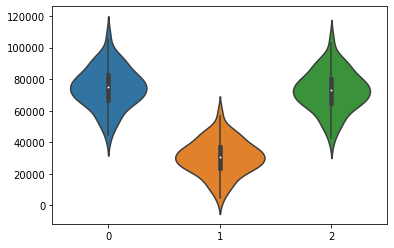

In [26]:
sns.violinplot(data=pd.DataFrame([a,b,c]).T,orient='v')

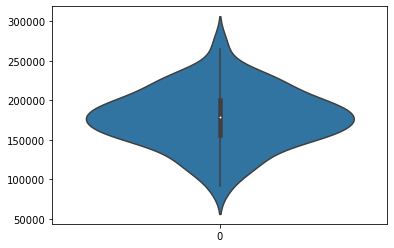

In [30]:
sns.violinplot(data=pd.DataFrame([a,b,c]).T.sum(axis=1),orient='v')

In [9]:
#Create the 1000 samples
np.random.normal(0,1,(1000))

array([-1.83911159e+00, -1.97946712e+00, -9.75452307e-01,  1.29197326e+00,
        5.36852568e-01,  1.56519178e-01, -1.08171444e+00,  2.35521714e-02,
       -2.18807331e+00,  1.97691424e-01,  1.71460632e+00,  3.52326440e-01,
        1.46341371e+00, -1.33620266e+00,  9.43271637e-01, -5.56790259e-01,
        1.89784270e+00, -6.80552038e-01,  4.48018657e-01, -1.02006683e+00,
        1.05352790e+00,  9.92035365e-01, -1.13744173e+00, -6.25507930e-01,
        1.25396182e+00, -6.80583958e-02, -7.70753312e-01, -6.01906311e-01,
        4.78393941e-01, -1.42843449e+00, -3.25516241e+00, -1.98313085e-01,
        1.28255748e+00,  3.48314973e-01,  5.58325938e-01, -5.09799207e-01,
       -1.29864880e+00, -1.92873364e-01, -2.56883108e+00, -2.78843519e-01,
        1.10425507e+00, -1.55492196e+00,  3.23236885e-01,  1.37788665e+00,
        2.26307434e+00,  1.05815524e-01, -4.53865541e-01,  4.75324334e-01,
        2.01770047e+00, -2.42015269e-01,  7.04358250e-01,  2.33924115e-01,
       -8.92328631e-02,  